## Université de Bordeaux,  Master Mention Informatique

## Intelligence Artificielle

### Deep Learning, feuille 1

### Présentation

Le but de ce premier TD est de vous familiariser avec les réseaux de neurones et leur entraînement. Nous allons passer en revue les éléments de base suivant :

 - données d'apprentissage, 
 
 - fonction de perte (loss function)
 
 - descente de gradient
 
 Pour cela, nous allons utiliser un réseau de neurone (composé d'un seul neurone en fait) pour deux tâches : 
 
  - une régression linéaire simple
  
  - une classification binaire.

Commençons par importer quelques unes des bibliothèques usuelles :

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### On génère les données 

Afin de réaliser une régression linéaire simple, nous allongs générer un nuage de points. Exécutez le code de la cellule suivante :

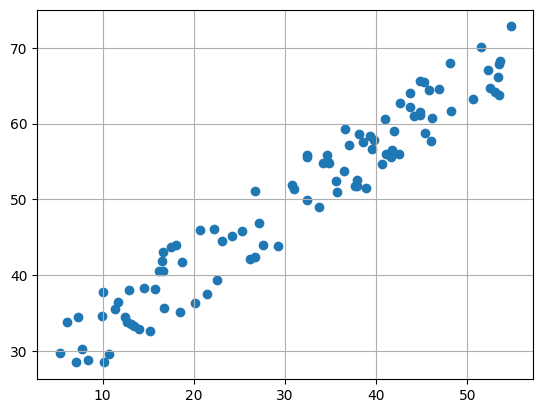

In [2]:
#Data: 
def generate(m, sizeNoise, slope, intersect):    
    x = [rd.random()*50 + 5 for i in range(m)]
    noise = [rd.random() * sizeNoise for i in range(m)]#np.rand(m,1) * sizeNoise
    y = [intersect + slope*x[i] + noise[i] for i in range(m)] 
    return np.array([x]), np.array([y])

m = 100
sizeNoise = 10
a = 0.8
b =  20
    
X, Y = generate(m, sizeNoise, a, b)
plt.grid()
plt.scatter(X, Y)

### Exercice 1. Un neurone :

Comme vu en cours, un neurone formel est représenté comme suit : 

![Un neurone formel (Mc Culloch & Pitts (1943))](img/formal_neuron_s.png)

1. Nommez chacun des élements du neurone.

2. Ecrivez une fonction <code>neuron(x, w, b, f)</code> permettant d'implémenter ce neurone.

xi = les entrées du neurone  
wi = les poids associés à chaque entrée  
b = le biais  
z = somme pondérée des entrées  
f = fonction d'activation  
y = sortie du neurone  

In [3]:
def neuron(x, w, b, f):
    return f(np.dot(x, w) + b)

3. Définissez deux fonctions <code>id</code> et <code>sigmoid</code> définies par :
$$
id(z) = z \mbox{ et } sigmoid(z) = \frac{1}{1+ e^{-z}}.
$$

In [4]:
def id(z):
    return z

def sigmoid(z):
    return 1/(1 + np.exp(-z))

4. Testez vos fonctions. L'exécution de la cellule suivante devrait donner le résultat affiché.

In [5]:
x = np.array([1])
w = np.array([1])
b = [1]

y_hat = neuron(x, w, b, id)
print('x: ', x)
print('y_hat: ', y_hat)

x:  [1]
y_hat:  [2]


### Exercice 2. Régression linéaire : 

Dans cet exercice, nous allons entraîner un neurone pour réaliser une régression linéaire simple. 

1. Dessiner le neurone qui sera utilisé. Identifiez bien les paramètres à trouver.

Dessin du neurone sans fonction d'activitation, ou avec la fonction identité : on fait une simple régression linéaire. Donc on ne casse pas la linéarité.

2. Ecrivez le code de la fonction <code>loss(y, y_hat)</code> définie comme la moyenne des carrés des écarts : 

$$
loss\left(y, \hat{y}\right) = \frac 1 {2*n} \sum_{i=1}^n \left(\hat{y_i} - y_i)\right)^2. 
$$

In [6]:
# mean squared error
# def loss(y, y_hat):
#     return np.mean((y - y_hat)**2)

def loss(y, y_hat):
    somme = np.sum((y_hat - y)**2)
    return somme / (2*y.shape[1])

3. Calculez le gradient de la fonction ${\cal L} = loss$ par rapport aux deux variables $w$ et $b$.

n = len(y)  
error = y - y_hat  
dw = -(1 / n) * np.sum(error * x)  
db = -(1 / n) * np.sum(error)  

4. Ecrivez la focntion <code>gradient(x, y_hat, y)</code> retournant le gradient de la fonction $\cal L$.

In [8]:
def gradient(x, y, y_hat):
    n = y.shape[1]
    error = y_hat - y
    dw = (1 / n) * np.sum(error * x)
    db = (1 / n) * np.sum(error)
    return dw, db

5. Ecrivez une fonction <code>train(x, y, eta, epochs)</code> qui réalise une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

In [9]:
# eta = learning rate

def train(x, y, eta, epochs):
    # Init
    w = 0.0
    b = 0.0
    
    for epoch in range(int(epochs)):
        # Prédiction
        y_hat = neuron(x, w, b, id)

        # MAJ paramètres
        dw, db = gradient(x, y, y_hat)
        w -= eta * dw
        b -= eta * db
        
        # Display
        if epoch % (epochs // 10) == 0:
            current_loss = loss(y, y_hat)
            print(f"Epoch {epoch}, Loss: {current_loss:.5f}")
    
    return w, b

6. Entraînez votre neurone. Prenez $0.001$ comme valeur pour le pas d'apprentissage, et $10000$ pour le nombre d'epochs.

In [13]:
w, b = train(X, Y, 0.001, 10000)
w, b

Epoch 0, Loss: 1315.10599
Epoch 1000, Loss: 43.76127
Epoch 2000, Loss: 32.08559
Epoch 3000, Loss: 23.88282
Epoch 4000, Loss: 18.11995
Epoch 5000, Loss: 14.07124
Epoch 6000, Loss: 11.22681
Epoch 7000, Loss: 9.22846
Epoch 8000, Loss: 7.82451
Epoch 9000, Loss: 6.83816


(np.float64(0.9152373254499713), np.float64(20.88675146478775))

7. Donnez l'équation de la droite de régression obtenue. Ecrivez l'instruction permettant de calculer les valeurs prédites.

y = 1412810.470839675 * x + 45452.48530338235

8. Dessinez la droite de régression sur la même figure que le nuage de point.

(100,)


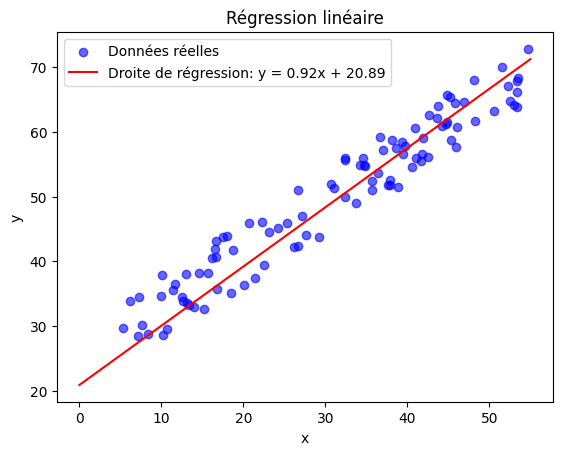

In [14]:
import matplotlib.pyplot as plt

# Nuage de points
plt.scatter(X, Y, label="Données réelles", color="blue", alpha=0.6)
# Droite de régression
reg_x = np.linspace(0, 55, 100)
reg_y = np.dot(reg_x.T, w) + b
print(reg_y.shape)
plt.plot(reg_x, reg_y, label=f"Droite de régression: y = {w:.2f}x + {b:.2f}", color="red")
# Légendes et affichage
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Régression linéaire")
plt.show()


9. Comparez le résultat obtenu avec la droite donnée par <code>linregress</code> du sous module <code>stats</code> du module <code>scipy</code>.

Scipy Linregress: slope = 0.80040, intercept = 25.19173
Notre modèle : w = 0.91524, b = 20.88675


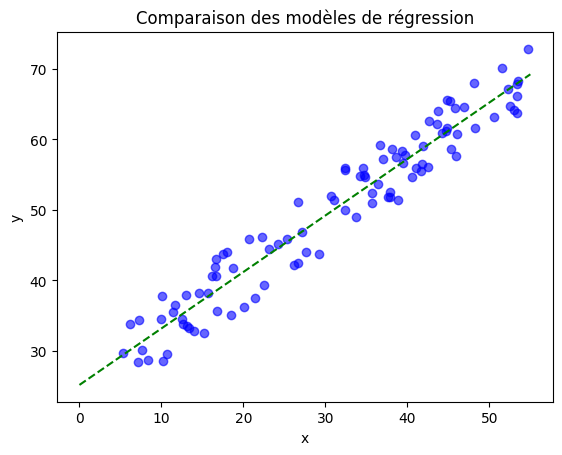

In [15]:
from scipy.stats import linregress

# Régression linéaire avec scipy
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Affichage des résultats
print(f"Scipy Linregress: slope = {slope:.5f}, intercept = {intercept:.5f}")
print(f"Notre modèle : w = {w:.5f}, b = {b:.5f}")

# Ajout de la droite de régression Scipy au tracé précédent
plt.scatter(X, Y, label="Données réelles", color="blue", alpha=0.6)
# plt.plot(reg_x, reg_y, label=f"Notre droite: y = {w:.2f}x + {b:.2f}", color="red")
plt.plot(reg_x, slope * reg_x + intercept, label=f"Scipy: y = {slope:.2f}x + {intercept:.2f}", color="green", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparaison des modèles de régression")
plt.show()


### Exercice 3. Régression logistique :

Dans cet exercice, nous allons transformer le neurone afin de l'utiliser pour réaliser une classification. Nous allons nous limiter à une classification bianire : les élements appartiennent soit à une classe 0 soit à une classe 1.  

1. Comment devons-nous appeler la "fonction" <code>neuron</code> pour que le fonction d'activation soit la sigmoid ?

In [42]:
# y_hat = neuron(X, w, b, sigmoid)

2. Exécutez la cellule suivante pour générer les données, les découper en deux parties train et test, etc. Observez le résultat de la cellule.

In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=1, n_classes=2, 
                           n_informative=1, n_redundant=0, n_repeated=0,
                          n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = X_train.reshape(-1)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y))

(750,)
(750,)
[0 1]


3. Définissez la nouvelle fonction de perte. Nous allons utiliser la fonction *cross_entropy* vue en cours :

$$
\cal L = -\frac 1 n \sum_{i=1} \left(y_i\times \log\left(\hat{y}_i\right) + (1-y_i)\log(1-\hat{y}_i)\right)
$$

In [45]:
def cross_entropy_loss(y, y_hat):
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

4. Ecrivez les expressions mathématiques de ce que calcule votre neurone.

$$
\cal \hat{y}_i = \sigma(z) = \frac{1}{1+e^{-w\cdot x - b}}
$$

5. Calculez le gradient de $\cal L$ et écrivez la fonction correspondante.
   
Indication : la dérivée de la fonction sigmoid est : $\sigma'(z) = \sigma(z)\left(1 - \sigma(z)\right)$.

$$
\cal \frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \cdot x_i
$$
$$
\cal  \frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
$$

6. Adaptez une fonction <code>train(x, y, nu, epochs)</code> pour réaliser une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

In [46]:
def gradient(x, y, y_hat):
    n = y.shape[0]
    error = y_hat - y
    dw = (1 / n) * np.sum(error * x)
    db = (1 / n) * np.sum(error)
    return dw, db

def train(x, y, eta, epochs):
    # Initialisation des paramètres
    w = 0.0
    b = 0.0

    for epoch in range(int(epochs)):
        # Prédiction
        y_hat = neuron(x, w, b, sigmoid)

        # Calcul des gradients
        dw, db = gradient(x, y, y_hat)

        # Mise à jour des paramètres
        w -= eta * dw
        b -= eta * db

        # Affichage périodique de la perte
        if epoch % (epochs // 10) == 0:
            current_loss = cross_entropy_loss(y, y_hat)
            print(f"Epoch {epoch}, Loss: {current_loss:.5f}")

    return w, b


7. Exécutez la cellule suivante pour que vos calculs matriciels puissent se faire et entraînez votre neurone.

In [47]:
w, b = train(X_train, y_train, eta=0.001, epochs=10000)

Epoch 0, Loss: 0.69315
Epoch 1000, Loss: 0.51707
Epoch 2000, Loss: 0.42738
Epoch 3000, Loss: 0.37502
Epoch 4000, Loss: 0.34107
Epoch 5000, Loss: 0.31732
Epoch 6000, Loss: 0.29976
Epoch 7000, Loss: 0.28621
Epoch 8000, Loss: 0.27539
Epoch 9000, Loss: 0.26653


8. Evaluez votre modèle. Pour cela : 

8.1. Exécutez la cellule suivante pour formater les données de test.

In [50]:
# X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))
X_test = X_test.reshape(-1)

8.2. Appliquez votre neurone aux données de test et observez le résultat obtenu.

In [51]:
y_hat = neuron(X_test, w, b, sigmoid)
y_hat.shape

(250,)

8.3. Transformez les sorties en 0 et 1 : 

In [52]:
y_hat = np.where(y_hat > 0.5, 1, 0)
y_hat

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1])

8.4. Evaluez la qualité du modèle obtenu 

In [54]:
acc = np.mean(y_hat == y_test)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.93
